**Question 1 - Extracting Tesla Stock Data Using yfinance**



In [17]:
!pip install yfinance
!pip install requests beautifulsoup4 pandas


In [15]:
import yfinance as yf


tesla = yf.Ticker("TSLA")
tesla_data = tesla.history(period="max")
tesla_data.reset_index(inplace=True)


print(tesla_data.head())



                       Date      Open      High       Low     Close  \
0 2010-06-29 00:00:00-04:00  1.266667  1.666667  1.169333  1.592667   
1 2010-06-30 00:00:00-04:00  1.719333  2.028000  1.553333  1.588667   
2 2010-07-01 00:00:00-04:00  1.666667  1.728000  1.351333  1.464000   
3 2010-07-02 00:00:00-04:00  1.533333  1.540000  1.247333  1.280000   
4 2010-07-06 00:00:00-04:00  1.333333  1.333333  1.055333  1.074000   

      Volume  Dividends  Stock Splits  
0  281494500        0.0           0.0  
1  257806500        0.0           0.0  
2  123282000        0.0           0.0  
3   77097000        0.0           0.0  
4  103003500        0.0           0.0  


**Question 2 - Extracting Tesla Revenue Data Using Webscraping**

In [23]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# URL of the webpage containing Tesla's revenue data
url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/amazon_data_webpage.html'

# Send a GET request to the webpage
response = requests.get(url)
response.raise_for_status()  # Check if the request was successful

# Parse the webpage content
soup = BeautifulSoup(response.content, 'html.parser')

# Find the table containing the revenue data
table = soup.find('table', {'class': 'TABLE_CLASS_NAME'})

# Extract table headers
headers = [header.text for header in table.find_all('th')]

# Extract table rows
rows = []
for row in table.find_all('tr')[1:]:  # Skip the header row
    columns = row.find_all('td')
    rows.append([col.text.strip() for col in columns])

# Create a DataFrame
tesla_revenue = pd.DataFrame(rows, columns=headers)

# Display the last five rows of the dataframe
print(tesla_revenue.tail())


AttributeError: 'NoneType' object has no attribute 'find_all'

**Question 3 - Extracting GameStop Stock Data Using yfinance**

In [20]:
import yfinance as yf
gamestop = yf.Ticker("GME")

gamestop_data = gamestop.history(period="max")
gamestop_data.reset_index(inplace=True)

print(gamestop_data.head())


                       Date      Open      High       Low     Close    Volume  \
0 2002-02-13 00:00:00-05:00  1.620129  1.693350  1.603296  1.691667  76216000   
1 2002-02-14 00:00:00-05:00  1.712708  1.716074  1.670626  1.683251  11021600   
2 2002-02-15 00:00:00-05:00  1.683250  1.687458  1.658001  1.674834   8389600   
3 2002-02-19 00:00:00-05:00  1.666418  1.666418  1.578047  1.607504   7410400   
4 2002-02-20 00:00:00-05:00  1.615920  1.662210  1.603296  1.662210   6892800   

   Dividends  Stock Splits  
0        0.0           0.0  
1        0.0           0.0  
2        0.0           0.0  
3        0.0           0.0  
4        0.0           0.0  


**Question 4 - Extracting GameStop Revenue Data Using Webscraping**

In [29]:

url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/amazon_data_webpage.html"
response = requests.get(url)
html_data = response.text
soup = BeautifulSoup(html_data, 'html.parser')


tables = soup.find_all('table')
gamestop_revenue = pd.read_html(str(tables[0]))[0]


print(gamestop_revenue.head())


           Date     Open     High      Low   Close* Adj Close**     Volume
0  Jan 01, 2021  3270.00  3363.89  3086.00  3206.20     3206.20   71528900
1  Dec 01, 2020  3188.50  3350.65  3072.82  3256.93     3256.93   77556200
2  Nov 01, 2020  3061.74  3366.80  2950.12  3168.04     3168.04   90810500
3  Oct 01, 2020  3208.00  3496.24  3019.00  3036.15     3036.15  116226100
4  Sep 01, 2020  3489.58  3552.25  2871.00  3148.73     3148.73  115899300


C:\Users\Yassine\AppData\Local\Temp\ipykernel_6364\49094253.py:8: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  gamestop_revenue = pd.read_html(str(tables[0]))[0]


**Question 5 - Tesla Stock and Revenue Dashboard**

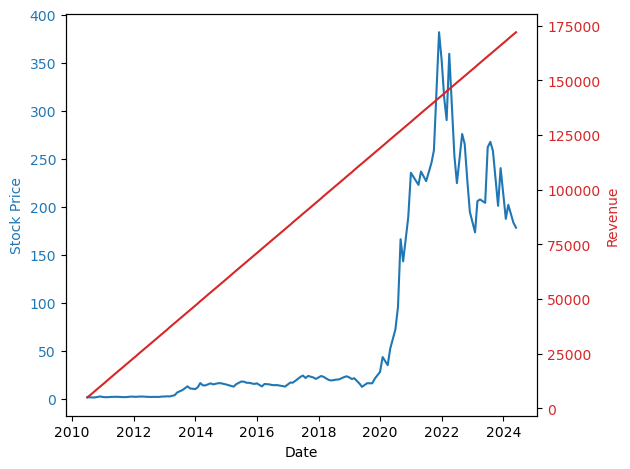

In [50]:
import pandas as pd
import matplotlib.pyplot as plt


tesla_revenue['Date'] = pd.to_datetime(tesla_revenue['Date'])

tesla_data['Date'] = tesla_data['Date'].dt.tz_localize(None)
merged_tesla_data = pd.merge(tesla_data, tesla_revenue, on='Date', how='inner')

# plotting
fig, ax1 = plt.subplots()

ax1.set_xlabel('Date')
ax1.set_ylabel('Stock Price', color='tab:blue')
ax1.plot(merged_tesla_data['Date'], merged_tesla_data['Close'], color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

ax2 = ax1.twinx()
ax2.set_ylabel('Revenue', color='tab:red')
ax2.plot(merged_tesla_data['Date'], merged_tesla_data['Revenue'], color='tab:red')
ax2.tick_params(axis='y', labelcolor='tab:red')

fig.tight_layout()
plt.show()


**Question 6 - GameStop Stock and Revenue Dashboard**

C:\Users\Yassine\AppData\Local\Temp\ipykernel_27288\2035434427.py:42: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  gamestop_revenue = pd.read_html(str(tables[1]))[0]  # Adjust the index if necessary


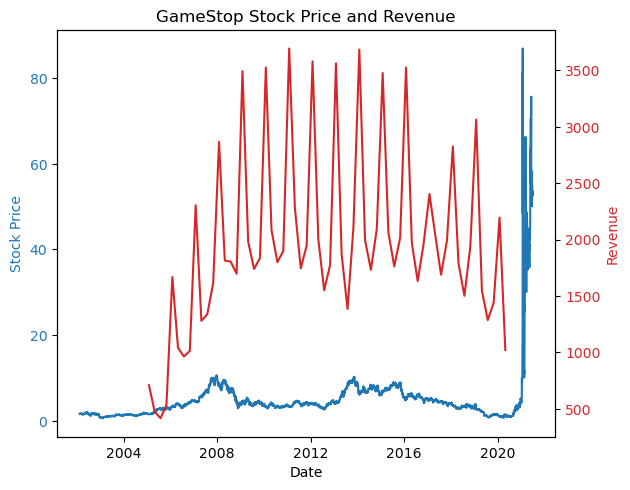

In [9]:
import pandas as pd
import yfinance as yf
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt

# Function to plot the stock data and revenue
def make_graph(stock_data, revenue_data, stock_name):
    fig, ax1 = plt.subplots()

    ax1.set_xlabel('Date')
    ax1.set_ylabel('Stock Price', color='tab:blue')
    ax1.plot(stock_data['Date'], stock_data['Close'], color='tab:blue')
    ax1.tick_params(axis='y', labelcolor='tab:blue')

    ax2 = ax1.twinx()
    ax2.set_ylabel('Revenue', color='tab:red')
    ax2.plot(revenue_data['Date'], revenue_data['Revenue'], color='tab:red')
    ax2.tick_params(axis='y', labelcolor='tab:red')

    fig.tight_layout()
    plt.title(f"{stock_name} Stock Price and Revenue")
    plt.show()

# Download GameStop stock data
gamestop = yf.Ticker("GME")
gamestop_data = gamestop.history(period="max")
gamestop_data.reset_index(inplace=True)
gamestop_data = gamestop_data[gamestop_data['Date'] <= '2021-06-30']

# Download the webpage containing GameStop revenue data
url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html'
response = requests.get(url)
html_data = response.text

# Parse HTML data to extract the revenue table
soup = BeautifulSoup(html_data, 'html.parser')
tables = soup.find_all('table')

if len(tables) > 0:
    # Read the first table into a DataFrame
    gamestop_revenue = pd.read_html(str(tables[1]))[0]  # Adjust the index if necessary

    # Clean and convert data
    gamestop_revenue.columns = ['Date', 'Revenue']
    gamestop_revenue['Date'] = pd.to_datetime(gamestop_revenue['Date'])
    gamestop_revenue = gamestop_revenue.dropna(subset=['Date'])  # Drop NaT values
    gamestop_revenue = gamestop_revenue[gamestop_revenue['Revenue'] != 'Revenue']  # Remove header rows if any
    gamestop_revenue['Revenue'] = gamestop_revenue['Revenue'].str.replace(',', '').str.replace('$', '').astype(float)
    gamestop_revenue = gamestop_revenue[gamestop_revenue['Date'] <= '2021-06-30']

    # Call the make_graph function
    make_graph(gamestop_data, gamestop_revenue, 'GameStop')
else:
    print("No tables found in the HTML content")
